# Scatterplot Game

Randomly generate points on a graph and the player has to input the (x,y) coordinates

For added difficulty, make the graph larger

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re

def scatterplot_game(level):
    if level == 1:
        xmin = ymin = -5
        xmax = ymax = 5
        ticks_frequency = 1
    elif level == 2:
        xmin = ymin = -16
        xmax = ymax = 16
        ticks_frequency = 2
    elif level == 3:
        xmin = ymin = -30
        xmax = ymax = 30
        ticks_frequency = 3

    point = (
        np.random.randint(xmin + 1, xmax),
        np.random.randint(ymin + 1, ymax)
    )
    
    fig = plt.figure(figsize=(9, 9))
    ax = fig.add_subplot(111)
    plt.axis([xmin, xmax, ymin, ymax])

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.xticks(np.arange(xmin, xmax+1, ticks_frequency))
    plt.yticks(np.arange(ymin, ymax+1, ticks_frequency))
    plt.plot([0, 0], [ymin, ymax], 'k', alpha = 0.5)
    plt.plot([xmin, xmax], [0, 0], 'k', alpha = 0.5)
    plt.plot([point[0]], [point[1]], 'ro')
    plt.show()

    answer = input("Enter the (x, y) point coordinates: ")
    point_answer = re.search("^\(?(-?\d+),\s?(-?\d+)\)?$", answer)

    if int(point_answer.group(1)) == point[0] and int(point_answer.group(2)) == point[1]:
        print("You got it!")
    else:
        print("Wrong!")
        print("The correct answer was ({}, {})".format(point[0], point[1]))


### Level 1

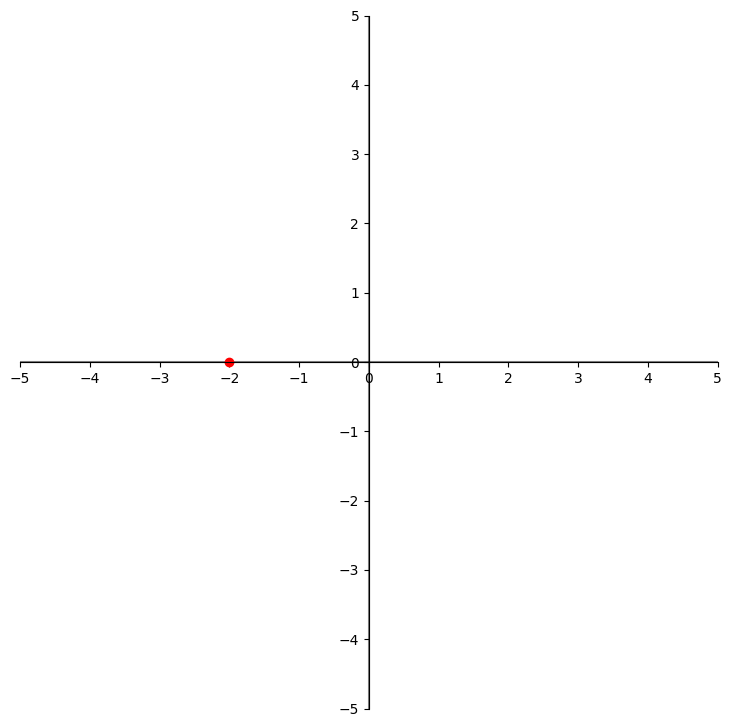

You got it!


In [2]:
scatterplot_game(1)

### Level 2

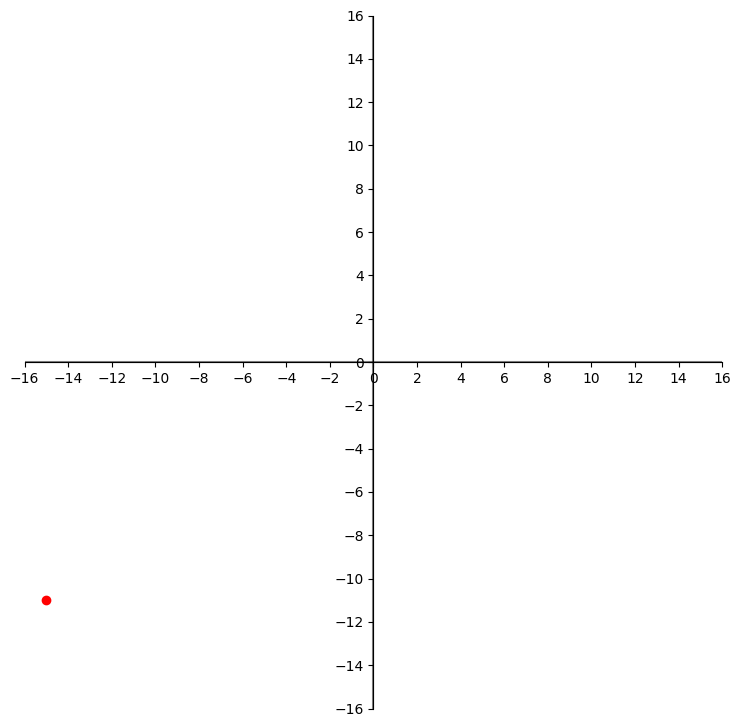

You got it!


In [3]:
scatterplot_game(2)

### Level 3

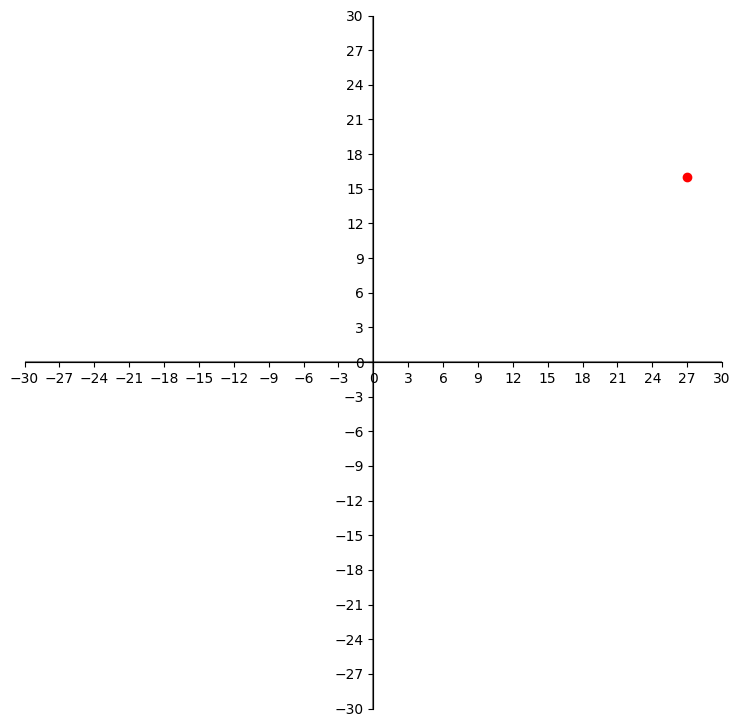

You got it!


In [4]:
scatterplot_game(3)

# Algebra Practice Game

Generate one-step and two-step problems with random integer values and the player has to input the answer

Use positive and negative values. For added difficulty, make the numbers larger

In [5]:
from numpy.random import choice, randint
from sympy import solve
from sympy.parsing.sympy_parser import parse_expr

def algebra_game(level):
    operators = ("+", "-", "*", "/")
    
    if level == 1:
        num_max = 10
        steps = (choice(operators))
    elif level == 2:
        num_max = 20
        steps = (choice(operators), choice(operators))
    elif level == 3:
        num_max = 35
        steps = (choice(operators), choice(operators))

    nums = [choice([1, -1]) * randint(1, num_max), 
            choice([1, -1]) * randint(1, num_max), 
            choice([1, -1]) * randint(1, num_max)]
    
    expression = "x ="

    for i, num in enumerate(nums):
        if num < 0:
            num_str = "({})".format(num)
        else:
            num_str = str(num)
        if i < len(steps):
            expression += " " + num_str + " " + steps[i]
        elif i == len(steps):
            expression += " " + num_str

    print(expression)
    result = round(solve(parse_expr(expression.split("=")[1] + " - x"))[0], 2)
    answer = float(input("Enter the x value, rounded to two decimal places: "))

    if abs(answer - result) <= 0.01:
        print("You got it!")
    else:
        print("Wrong!")
        print("The correct result was:", result)


### Level 1

In [6]:
algebra_game(1)

x = 4 + 7
You got it!


### Level 2

In [7]:
algebra_game(2)

x = (-19) * (-14) / (-3)
You got it!


### Level 3

In [8]:
algebra_game(3)

x = 31 * (-33) / (-28)
You got it!


# Projectile game

Display a "wall" with random height and location. Player has to move sliders to adjust a parabolic path to clear the wall

For added difficulty, make a second level where players enter a, b, and c without sliders

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider

def projectile_game(level):
    height = np.random.randint(10, 100)
    location = np.random.randint(1, 25)

    def f(a, b, c):
        vx = -b/(2 * a)
        vy = a * vx ** 2 + b * vx + c
        xmin = 0
        xmax = location + 10
        ymin = 0
        ymax = max(height + 10, vy + 1)
        points = 10*(xmax-xmin)
        x = np.linspace(xmin,xmax,points)
        y = a*x**2 + b*x + c

        if a * location**2 + b * location + c <= height:
            plt.title("Not yet...", color="red")
        else:
            plt.title("You got it!", color="green")

        plt.axis([xmin, xmax, ymin, ymax])
        plt.plot([location, location], [0, height], 'g')
        plt.plot(x, y)
        plt.show()

    if level == 1:
        interactive_plot = interactive(
            f, 
            a=FloatSlider(min=-9, max=-1, step=1, value=-1), 
            b=FloatSlider(min=0, max=50, step=1, value=0), 
            c=FloatSlider(min=-99, max=99, step=1, value=0),
        )
        return interactive_plot
    elif level == 2:
        xmin = 0
        xmax = location + 10
        ymin = 0
        ymax = height + 10

        plt.axis([xmin, xmax, ymin, ymax]) # window size
        plt.plot([location, location], [0, height], 'g')
        plt.show()

        a = float(input("Enter value for a: "))
        if a == 0:
            return print("The value for a can't be zero.")
        b = float(input("Enter value for b: "))
        c = float(input("Enter value for c: "))

        return f(a, b, c)



### Level 1

In [10]:
projectile_game(1)

interactive(children=(FloatSlider(value=-1.0, description='a', max=-1.0, min=-9.0, step=1.0), FloatSlider(valu…

### Level 2

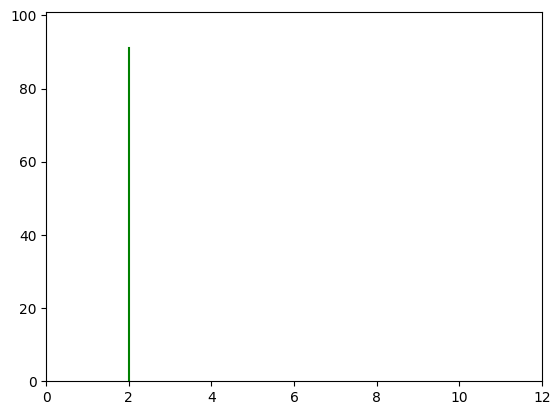

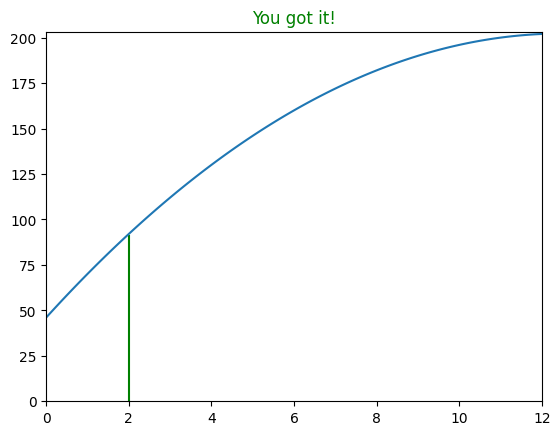

In [12]:
projectile_game(2)